# Introduction to fractal dimension 
In this notebook we will discuss the concept of parametrization of the surface at different scales in a deeper manner. We introduce the fractal dimension.

In [ ]:
!pip install Shapely
!pip install geopandas

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString,Point,MultiPoint,LinearRing
from matplotlib2tikz import save as tikz_save
import geopandas

In [2]:
plt.rcParams["figure.figsize"] = (18,3)

We create a random profile for initial testing:

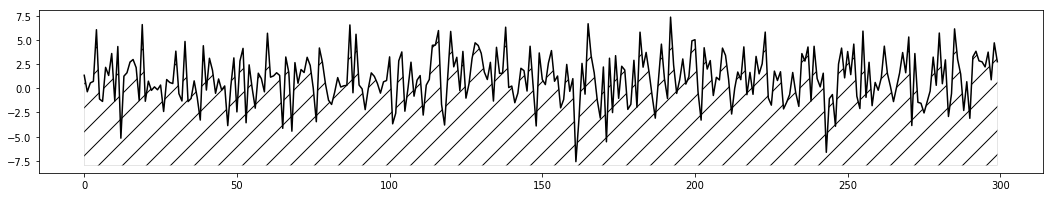

In [3]:
mean, sigma = 1, 2.5 # mean and standard deviation
points = 300
xp = range(points)
yp = np.random.normal(mean, sigma, points)
plt.plot(xp,yp,'k-')
plt.fill_between(xp, -8, yp, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
plt.show()

Now we define a `LineString` data structure for rappresenting the profile. This is equivalent to a polyline or a polygonal chain in geometry.

In [4]:
list_of_point = list(zip(xp,yp))
profile = LineString(list_of_point)

We define a function for finding the intersection of the circle with the LineString.

In [5]:
sampling_radius = 5
def find_inter(p,sampling_radius,profile=profile):
    # Create a circle c with a radius = sampling radius.
    c = p.buffer(sampling_radius).boundary
    # Find intersection of the circle with the profile.
    i = c.intersection(profile)
    #print i
    return i


In [6]:
p1 = find_inter(Point(list(list_of_point)[0]),sampling_radius=sampling_radius)
print(p1)

MULTIPOINT (3.735235965493478 4.68262328592174, 4.30645934090231 3.896500673538968, 4.832586654416793 0.1071708013431173)


In [7]:
%qtconsole

In [8]:
go = True
count = 0
# we define the starting point
point = Point(list_of_point[0])
intersections  = []
points_found = []
points_found.append(point)
for i in range(40):
    pointx = point.coords[0][0]
    # we find the next point (the intersection)
    point = find_inter(point,sampling_radius,profile=profile)
    count +=1
    intersections.append(point)
    # if there is more than one interesection we will have a multi point
    if type(point) is MultiPoint:
        listx = np.array([i.coords[0][0] for i in point])
        # find the smallest value after the starting point
        value = listx[listx > pointx].min()
        # This is true for profile following a straight line because they
        # ordered  
        itemindex = np.where(listx==value)
        point = point[itemindex[0][0]]
        points_found.append(point)
    else:
        points_found.append(point)

In [9]:
multi = intersections[3]
multi[0].coords[0]

(4.151427068236206, 5.013090530932694)

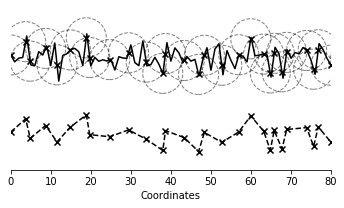

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
maxyp, minyp = max(yp),min(yp)
ax.plot(xp,yp,'k-')
for inter in intersections:
    # if there is more than one intersection
    if type(inter) is MultiPoint:
        for j in inter:
            x,y = j.coords[0]
            # we can plot all the intersections found
            #ax.scatter(x,y,color='k',marker='x',alpha=0.5)
    else:
        x,y = inter.coords[0]
        #ax.scatter(x,y,color='b',marker='x')
for pt in points_found:
    x,y = pt.coords[0]
    circle1 = plt.Circle((x, y), sampling_radius, color='k', fill=False,linestyle='--',alpha=0.5)
    ax.add_artist(circle1)

xn,yn = np.array([pt.coords[0] for pt in points_found]).T
ax.scatter(xn,yn,color='k',marker='x')
maxyn, minyn = max(yn),min(yn)
#ax.plot(xn,yn,linestyle='--',color='g')
ax.set_aspect('equal')
shifteyn = yn - maxyn - abs(minyp) - sampling_radius*1.2
ax.plot(xn,shifteyn,linestyle='--',color='k')
ax.scatter(xn,shifteyn,color='k',marker='x')
ax.set_ylim(min(shifteyn)+min(shifteyn)*0.2,maxyp+sampling_radius*1.2)
ax.set_xlim(0,80)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_xlabel("Coordinates")
#fig.savefig("fig3.pgf")
#tikz_save("test3.tex")
# unit vector ratio*=1 1 1,
plt.show()



We have try now to deal with more complex shapes. In particular when we have more than one point for coordinate.
This data has been extracted from https://www.ngdc.noaa.gov/mgg/shorelines/data/gshhg/latest/gshhg-shp-2.3.7.zip (last modified 2018-03-02 18:42). GSHHG is released under the GNU Lesser General Public license, and is developed and maintained by Dr. Paul Wessel, SOEST, University of Hawai, and Dr. Walter H. F. Smith, NOAA Laboratory for Satellite Altimetry. To reproduce the experiment by Richardson we extracted the coast of Great Britain and saved in a .shp file.

In [11]:
gbr = geopandas.read_file(r'.\Data\ID_15_GSHHS_F_L1.shp')
len(list(gbr.geometry.iloc[0].coords))

49153

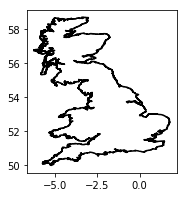

In [12]:
gbr.plot(color='k')

In [45]:
gbr_points = np.array(list(gbr.geometry.iloc[0].coords))

LINESTRING (0 50.787944, -0.005 50.787889, -0.006722 50.788722, -0.010083 50.788694, -0.011639 50.789556, -0.013361 50.789583, -0.015 50.790361, -0.016722 50.790417, -0.018389 50.79125, -0.02 50.79125, -0.021667 50.792083, -0.023361 50.792083, -0.025028 50.792917, -0.028361 50.792889, -0.033361 50.795417, -0.035056 50.795389, -0.036722 50.79625, -0.038333 50.796222, -0.04 50.797056, -0.043333 50.797083, -0.045083 50.797944, -0.050056 50.797889, -0.051694 50.798722, -0.055028 50.79875, -0.056722 50.799611, -0.058333 50.799528, -0.060056 50.800417, -0.061694 50.800417, -0.063361 50.801194, -0.064972 50.80125, -0.06838900000000001 50.802861, -0.07002800000000001 50.802917, -0.07166699999999999 50.80375, -0.073389 50.803722, -0.076694 50.805417, -0.078417 50.805417, -0.081639 50.807083, -0.083361 50.807056, -0.08502800000000001 50.807917, -0.08672199999999999 50.807889, -0.088306 50.808722, -0.090028 50.808722, -0.093333 50.810389, -0.095056 50.810389, -0.096722 50.811222, -0.098333 50.811

The problem with this shape is that we might have some intersection closer to the origin point which are actually very far along the coast. So we have to select the first intersection following the coastline.

In [14]:
go = True
count = 0
# we define the starting point
x,y = gbr_points[0]
point = Point(x,y)
intersections  = []
points_found = []
points_found.append(point)
sampling_radius = 3
multipoint = None
print(type(point))
for i in range(40):
    oldpoint = point.coords[0] # this is the center of the circle
    # we find the next point (the intersection) with the geometry of the shapfile
    point = find_inter(point,sampling_radius,profile=gbr.geometry.iloc[0]) 
    count +=1
    intersections.append(point)
    # if there is more than one interesection we will have a multi point
    if type(point) is MultiPoint:
        multipoint = point
        indexes = [idx for idx,elem in enumerate(haystack) if elem in needles ]

        points_found.append(point)
    else:
        points_found.append(point)

<class 'shapely.geometry.point.Point'>


NameError: name 'haystack' is not defined

# Rolling circle envelope 
The method used by Richardson, maybe substit

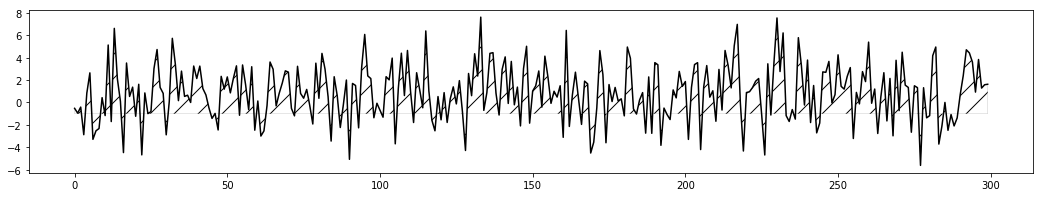

In [15]:
mean, sigma = 1, 2.5 # mean and standard deviation
points = 300
xp = range(points)
yp = np.random.normal(mean, sigma, points)
plt.plot(xp,yp,'k-')
plt.fill_between(xp, -1, yp, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
plt.show()

In [16]:
list_of_point = list(zip(xp,yp))
profile = LineString(list_of_point)

In [17]:
circle_radius = 2
max_value = max(yp)
# The circle will never encounter value above the max value of the profile
starting_ycoord = max_value + circle_radius
min_ycord = min(yp) + circle_radius
# TODO: we could optimize the range over windows of the size of the diameters.
points = []
traiectory = []
for step in range(40):
    xcoor = list_of_point[step][0]
    max_value = list_of_point[step][1] + circle_radius*0.9
    for y in np.linspace(starting_ycoord,max_value):
        p = Point(xcoor,y)
        # Create a circle c with a radius = sampling radius.
        c = p.buffer(circle_radius).boundary
        # Find intersection of the circle with the profile.
        traiectory.append((xcoor,y))
        if c.intersects(profile):
            points.append((xcoor,y))
            break

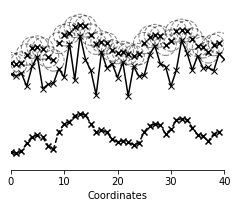

In [18]:

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
maxyp, minyp = max(yp),min(yp)
ax2.plot(xp,yp,'k',marker = 'x')

for pt in points:
    circle1 = plt.Circle(pt, circle_radius, color='k', fill=False,linestyle='--',alpha=0.5)
    ax2.add_artist(circle1)
#traiectory
#xt,yt = np.array(traiectory).T
#ax2.scatter(xt,yt,color='g',marker = 'x',alpha=0.4)
    
xn,yn = np.array(points).T
ax2.scatter(xn,yn,color='k',marker='x')
maxyn, minyn = max(yn),min(yn)
#ax.plot(xn,yn,linestyle='--',color='g')
ax2.set_aspect('equal')
shifteyn = yn - maxyn - abs(minyp) - circle_radius*1.2
ax2.plot(xn,shifteyn,linestyle='--',color='k')
ax2.scatter(xn,shifteyn,color='k',marker='x')
ax2.set_ylim(min(shifteyn)+min(shifteyn)*0.2,maxyp+circle_radius*2.2)
ax2.set_xlim(0,40)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_xlabel("Coordinates")
#fig.savefig("fig3.pgf")
#tikz_save("test3.tex")
# unit vector ratio*=1 1 1,
plt.show()


In [19]:
%qtconsole

In [20]:
xpt = [-6,1,2,2.5,4,1,-1,2,4,5,6]
ypt = [-8,1,1,0,1,2,2,3,4,4,4]
sampling_radius=1.5
list_of_point = list(zip(xpt,ypt))
p = Point(2,1)
profile = LineString(list_of_point)
c = p.buffer(sampling_radius).boundary
# Find intersection of the circle with the profile.
#points = c.intersection(profile)
points = profile.intersection(c)

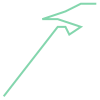

In [21]:
profile

In [22]:
points = find_inter(Point(2,1),sampling_radius=1.5,profile=profile)

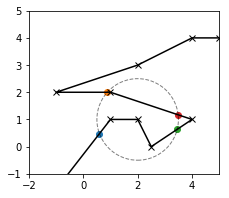

In [78]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_xlim(-2,5)
ax3.set_ylim(-1,5)
maxyp, minyp = max(ypt),min(ypt)
ax3.plot(xpt,ypt,'k',marker = 'x')
ax3.set_aspect('equal')
circle_radius = 1.5
circle1 = plt.Circle((2,1), sampling_radius, color='k', fill=False,linestyle='--',alpha=0.5)
for i in np.array(points):
    ax3.scatter(i[0],i[1])
#ax3.annotate(-1,0,1,1)
ax3.add_artist(circle1)

In [79]:
np.array(points)

array([[0.59507244, 0.47937886],
       [0.88436065, 2.        ],
       [3.45316212, 0.63544141],
       [3.48933636, 1.17022121]])

In [80]:
for i in profile.coords:
    print(i)

(-6.0, -8.0)
(1.0, 1.0)
(2.0, 1.0)
(2.5, 0.0)
(4.0, 1.0)
(1.0, 2.0)
(-1.0, 2.0)
(2.0, 3.0)
(4.0, 4.0)
(5.0, 4.0)
(6.0, 4.0)


In [81]:
from shapely.ops import split
def split_profile(profile):
    points_to_split = MultiPoint([Point(x,y) for x,y in profile.coords[1:]])
    print("Splitting...")
    splitted_profile = split(profile,points_to_split)
    print("splitted_profile points...")
    return splitted_profile

In [91]:
def split_profile_slow(profile):
    splitted = []
     # Progress bar
    for index in range(len(profile.coords) -1):
        splitted.append(LineString([profile.coords[index], profile.coords[index+1]]))
        j = (index + 1) / len(profile.coords) -1
        sys.stdout.write('\r')
        # the exact output you're looking for:
        sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
        sys.stdout.flush()
    return splitted

In [83]:
import sys

def Richardson_filter(splitted_profile,sampling_radius):
    currentpoint = splitted_profile[0]
    intersections_list = [currentpoint.coords[0],currentpoint.coords[0]]
    every_intersection = []
    c = currentpoint.buffer(sampling_radius).boundary
    index = 0
    inline = False # True when the previous point was on the same segment
    progress = 0
    while index < len(splitted_profile):
        # Progress bar
        j = (index + 1) / len(splitted_profile)
        sys.stdout.write('\r')
        # the exact output you're looking for:
        sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
        sys.stdout.flush()
        intersections = splitted_profile[index].intersection(c)
        every_intersection.append(intersections)
        # First case we have a single intersection
        if (type(intersections) is Point):
            if inline:
                # if the intersection is in the same line of the
                # previuous one we must check that we are not
                # going backward
                # we get the origin of the segment
                xs,ys  = splitted_profile[index].coords[0]
                xi,yi = intersections.coords[0]
                # and the point of the previous intersection
                xp, yp = intersections_list[-1]
                # we calculate the distance from the origin
                # for the new intersection
                dist_inter = ((xs-xi)**2 + (ys-yi)**2 )**0.5
                # and the previous one
                dist_old = ((xs-xp)**2 + (ys-yp)**2)**0.5
                if dist_inter > dist_old:
                    # if we are getting far from the origin
                    # we store it
                    currentpoint = intersections
                    c = currentpoint.buffer(sampling_radius).boundary
                    intersections_list.append(intersections.coords[0])
                    inline = True
                    continue
                else:
                    # otherwise it means that we are going back
                    # so for going furhter we must go to the next segment
                    index +=1
                    inline = False
                    continue
            else:
                # if it's a new segment we have no problem of direction
                currentpoint = intersections
                c = currentpoint.buffer(sampling_radius).boundary
                intersections_list.append(intersections.coords[0])
                inline = True
                continue

        # Second case we find more than one intersection
        if type(intersections) is MultiPoint:
            # A segment can intersect a circle in at maximum two points
            # coordinates of the origin of the segment
            xs,ys  = splitted_profile[index].coords[0]
            # coordinates first point
            xa, ya = intersections[0].x,intersections[0].y
            # coordinates second point
            xb, yb = intersections[1].x,intersections[1].y
            # distance frist point from the origin
            dist_a = ((xs-xa)**2 + (ys-ya)**2 )**0.5
            # distance second point from the origin
            dist_b = ((xs-xb)**2 + (ys-yb)**2)**0.5
            # we check which is the further from the origin
            if dist_a > dist_b:
                currentpoint = intersections[0]
            else:
                currentpoint = intersections[1]
            c = currentpoint.buffer(sampling_radius).boundary
            intersections_list.append(currentpoint.coords[0])
            inline = True
            continue

        # Third case we don't find any intersection    
        else:
            # we pass to the next segment if the current circle
            # do not intersect with it.
            # Rememeber more than one circles could intersect with
            # a segment excpecially if it's very long
            index +=1
            inline = False
    return intersections_list

[====================] 100%

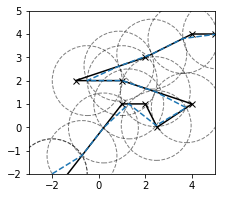

In [92]:
splitted_profile = split_profile_slow(profile)
intersection_list = Richardson_filter(splitted_profile,sampling_radius=1.5)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.set_xlim(-3,5)
ax4.set_ylim(-2,5)
ax4.plot(xpt,ypt,'k',marker = 'x')
ax4.set_aspect('equal')
for x,y in intersections_list:
    circle1 = plt.Circle((x,y), sampling_radius, color='k', fill=False,linestyle='--',alpha=0.5)
    ax4.add_artist(circle1)
ax4.plot(np.array(intersections_list)[:,0],np.array(intersections_list)[:,1],'--')


In [93]:
splitted_gbr = split_profile_slow(gbr.geometry.iloc[0])

[                    ] 0%%%[                    ] -8%[                    ] -6%

In [94]:
splitted_gbr

 ...]

In [95]:
intersection_list_gbr = Richardson_filter(splitted_gbr,sampling_radius=200)

[====================] 100%=====               ] 29%[=================   ] 88%

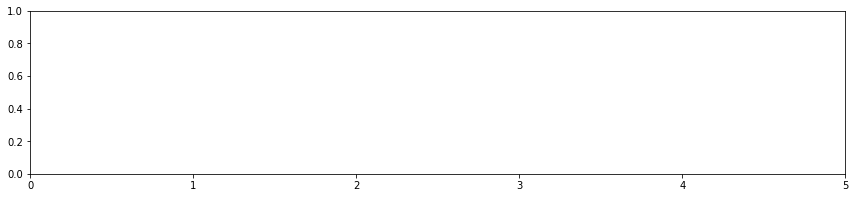

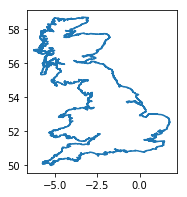

In [107]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
#print(gbr.geometry.iloc[0].coords)
#ax5.plot(xpt,ypt,'k',marker = 'x')
ax5.set_xlim(0,5)
ax5.set_aspect('equal')
sampling_radius = 200
gbr.plot()
for x,y in intersection_list_gbr:
    #ax5.scatter(x,y)
    circle1 = plt.Circle((x,y), sampling_radius, color='k', fill=False,linestyle='--',alpha=0.5)
    ax5.add_artist(circle1)
#ax5.plot(np.array(intersection_list_gbr)[:,0],np.array(intersection_list_gbr)[:,1],'--')

In [ ]:
ax = 

In [51]:
from time import sleep
import sys
n = 21
for i in range(n):
    j = (i + 1) / n
    sys.stdout.write('\r')
    # the exact output you're looking for:
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
    sys.stdout.flush()
    sleep(0.25)

[====================] 100%

In [ ]:
from math import isclose
currentpoint = Point(-2.0, -2.0)
intersections_list = [currentpoint.coords[0],currentpoint.coords[0]]
c = currentpoint.buffer(sampling_radius).boundary
index = 0
for i in range(40):
    print(index)
    intersections = splitted[index].intersection(c)
    print(type(intersections))
    current_coord = intersections.coords[0]
    opposite_coord = intersections_list[-2]
    if (type(intersections) is Point) and tuple_are_different(current_coord,opposite_coord):
            currentpoint = intersections
            c = currentpoint.buffer(sampling_radius).boundary
            intersections_list.append(intersections.coords[0])
    else:
        # we pass to the next segment if the current circle
        # do not intersect with it.
        # Rememeber more than one circles could intersect with
        # a segment excpecially if it's very long
        index +=1
        inline = False